In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import sys
import os

# Add project root to Python path
project_root = Path.cwd().parent  # Go up one level from src to project root
sys.path.append(str(project_root))

# Now we can import from config
from config.const import DEFAULT_TARGET_FEATURE

# Get all monthly train and test files separately
# Use Path to handle paths correctly
data_dir = project_root / "data" / "output" / "preprocessed"
train_files = list(data_dir.glob("*_train.csv"))
test_files = list(data_dir.glob("*_test.csv"))

# Sort files by month
train_files.sort()
test_files.sort()

print(train_files)

print("\nTrain files found:", len(train_files))
print("Test files found:", len(test_files))

# Function to load and prepare monthly data
def load_monthly_data(file_path):
    """Load data for a specific month and select relevant columns."""
    df = pd.read_csv(file_path)
    return df

# Load train data
train_data = {}
for file in train_files:
    month = file.stem.split('_')[-2]  # Extract month number
    df = load_monthly_data(file)
    train_data[month] = df
    print(f"Loaded train data for month {month} with shape {df.shape}")

# Load test data
test_data = {}
for file in test_files:
    month = file.stem.split('_')[-2]  # Extract month number
    df = load_monthly_data(file)
    test_data[month] = df
    print(f"Loaded test data for month {month} with shape {df.shape}")

# Create combined dataframes for train and test
train_combined = pd.concat(
    [df.assign(month=month) for month, df in train_data.items()],
    ignore_index=True
)

test_combined = pd.concat(
    [df.assign(month=month) for month, df in test_data.items()],
    ignore_index=True
)

# Months as integer
train_combined['month'] = train_combined['month'].astype(int)
test_combined['month'] = test_combined['month'].astype(int)

# # Convert and save trainDelayed as 0/1 : True: 1, False: 0
# train_combined['trainDelayed'] = train_combined['trainDelayed'].map({True: 1, False: 0})
# test_combined['trainDelayed'] = test_combined['trainDelayed'].map({True: 1, False: 0})

print("\nCombined data shapes:")
print(f"Train data: {train_combined.shape}")
print(f"Test data: {test_combined.shape}")
train_combined.head(10)



[WindowsPath('d:/Oulu MSc/Summer Internship 2025/Railway-FMI-Data_training/data/output/preprocessed/preprocessed_data_2020-2024_01_train.csv'), WindowsPath('d:/Oulu MSc/Summer Internship 2025/Railway-FMI-Data_training/data/output/preprocessed/preprocessed_data_2020-2024_02_train.csv'), WindowsPath('d:/Oulu MSc/Summer Internship 2025/Railway-FMI-Data_training/data/output/preprocessed/preprocessed_data_2020-2024_03_train.csv'), WindowsPath('d:/Oulu MSc/Summer Internship 2025/Railway-FMI-Data_training/data/output/preprocessed/preprocessed_data_2020-2024_04_train.csv'), WindowsPath('d:/Oulu MSc/Summer Internship 2025/Railway-FMI-Data_training/data/output/preprocessed/preprocessed_data_2020-2024_05_train.csv'), WindowsPath('d:/Oulu MSc/Summer Internship 2025/Railway-FMI-Data_training/data/output/preprocessed/preprocessed_data_2020-2024_06_train.csv'), WindowsPath('d:/Oulu MSc/Summer Internship 2025/Railway-FMI-Data_training/data/output/preprocessed/preprocessed_data_2020-2024_07_train.csv')

,Air temperature,Wind speed,Gust speed,Wind direction,Relative humidity,Dew-point temperature,Precipitation intensity,Snow depth,Pressure (msl),Horizontal visibility,Cloud amount,data_year,differenceInMinutes,month
0,0.496235,0.052986,-0.159144,-0.341385,0.557054,0.546591,-0.264487,-0.638229,-2.237539,0.953336,0.474039,2022,19.0,1
1,1.182520,0.167057,0.330622,0.042487,1.205764,1.288039,-0.264487,-1.026712,0.056418,-1.201637,0.474039,2023,0.0,1
2,-1.500232,-1.087731,-1.165884,-0.569309,0.038087,-1.414657,-0.264487,0.332977,0.225770,-1.400560,0.849783,2022,19.0,1
3,0.758271,0.014962,0.140157,1.074143,1.205764,0.881438,-0.264487,1.368931,-0.736460,-1.282451,0.474039,2024,205.0,1
4,0.945440,0.889511,1.146898,0.678275,-1.648558,0.630303,-0.264487,-1.544689,-1.544733,0.953336,0.474039,2020,0.0,1
5,0.745793,-0.099110,-0.131934,0.450351,0.297570,0.749891,-0.264487,-1.544689,-0.528618,0.530308,-2.531910,2020,1.0,1
6,-0.352264,-0.289229,-0.322399,-1.493000,-0.091655,-0.350321,1.310114,0.656713,-0.089841,-1.373128,0.474039,2021,17.0,1
7,0.533668,-0.669468,-0.784955,0.042487,1.076022,0.642262,0.129163,-0.314494,0.133396,-0.764438,0.474039,2021,3.0,1
8,-0.614300,2.752682,1.935964,-1.900864,-0.221397,-0.601457,-0.264487,-1.544689,-0.790345,0.041307,-2.156166,2022,-2.0,1
9,-0.863858,-0.175158,-0.567281,-0.581305,-0.610623,-0.888469,-0.264487,-0.702976,1.519007,1.854545,-0.653192,2023,140.0,1


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def add_delay_class_column(df, column='differenceInMinutes', plot=True):
    """
    Adds a 'delay_class' column to the DataFrame based on the delay thresholds.
    
    Parameters:
    - df: pandas DataFrame with a delay column
    - column: name of the column with delay values in minutes (default: 'differenceInMinutes')
    - plot: whether to display a bar chart of the class distribution (default: True)
    
    Returns:
    - Modified DataFrame with a new 'delay_class' column
    """

    def label_delay(minutes):
        if minutes < 0:
            return 'early_arrival'
        elif minutes < 2:
            return 'delay_upto_2_mins'
        elif minutes < 5:
            return 'delay_2_to_5_mins'
        else:
            return 'delay_over_5_mins'

    # Apply function to create the delay class column
    df = df.copy()
    df['delay_class'] = df[column].apply(label_delay)
    df['delay_class'] = df['delay_class'].astype('category')

    # Print class distribution
    print("Class distribution in '{}':".format(column))
    print(df['delay_class'].value_counts())

   # Optional plot
    if plot:
        import seaborn as sns
        sns.set_theme(style="whitegrid")  # Use a clean seaborn style

        fig, ax = plt.subplots(figsize=(10, 6))  # Bigger figure

        # Use a nice color palette
        palette = sns.color_palette("pastel")
        value_counts = df['delay_class'].value_counts().sort_index()
        bars = ax.bar(value_counts.index, value_counts.values, color=palette[:len(value_counts)])

        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 8),  # 8 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=13, fontweight='bold')

        ax.set_title(f'Class Distribution in delay_class ({column})', fontsize=18, fontweight='bold')
        ax.set_xlabel('Delay Class', fontsize=15)
        ax.set_ylabel('Number of Samples', fontsize=15)
        ax.tick_params(axis='x', labelsize=13)
        ax.tick_params(axis='y', labelsize=13)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # Remove top and right spines for a cleaner look
        sns.despine(ax=ax)

        plt.tight_layout()
        plt.show()
    return df


Class distribution in 'differenceInMinutes':
delay_class
delay_over_5_mins    464884
delay_upto_2_mins    442989
early_arrival        378982
delay_2_to_5_mins    343079
Name: count, dtype: int64


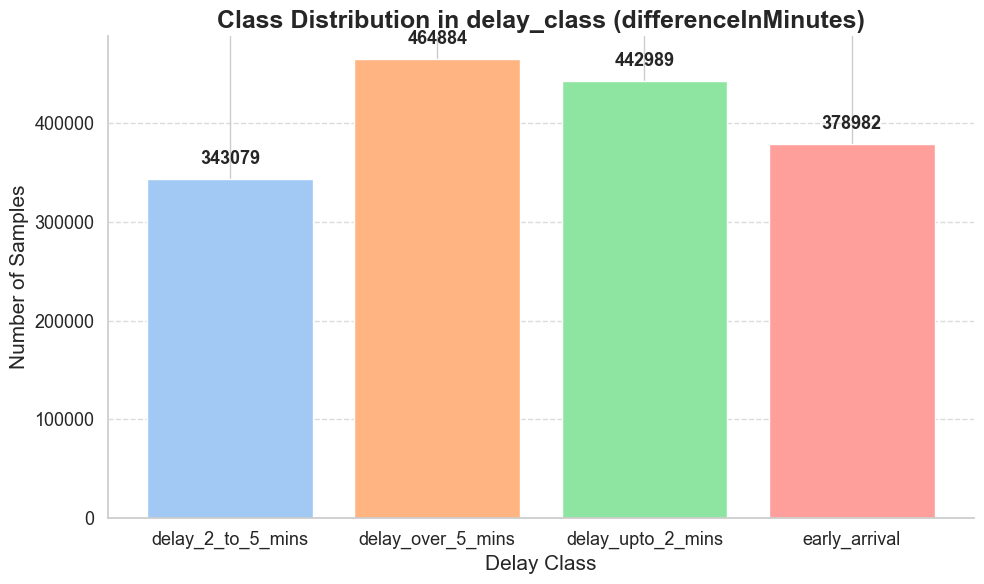

Class distribution in 'differenceInMinutes':
delay_class
delay_over_5_mins    199871
delay_upto_2_mins    189679
early_arrival        162021
delay_2_to_5_mins    146981
Name: count, dtype: int64


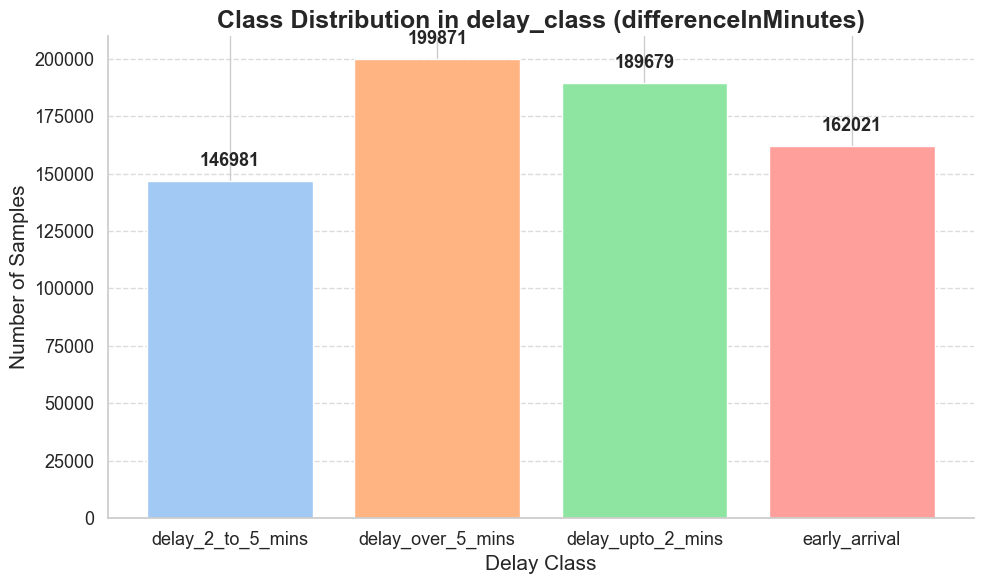

In [36]:

train_combined = add_delay_class_column(train_combined)
test_combined = add_delay_class_column(test_combined)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assume df is your full dataset
# Already split? Then load X_train, y_train, X_test, y_test

# If not already done:
X_train = train_combined.drop(['delay_class', 'differenceInMinutes'], axis=1)
y_train = train_combined['delay_class']

X_test = test_combined.drop(['delay_class', 'differenceInMinutes'], axis=1)
y_test = test_combined['delay_class']

# Optional: train-test split if needed
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# Baseline model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))



                   precision    recall  f1-score   support

delay_2_to_5_mins       0.70      0.66      0.68    146981
delay_over_5_mins       0.85      0.88      0.87    199871
delay_upto_2_mins       0.67      0.68      0.67    189679
    early_arrival       0.74      0.74      0.74    162021

         accuracy                           0.75    698552
        macro avg       0.74      0.74      0.74    698552
     weighted avg       0.75      0.75      0.75    698552



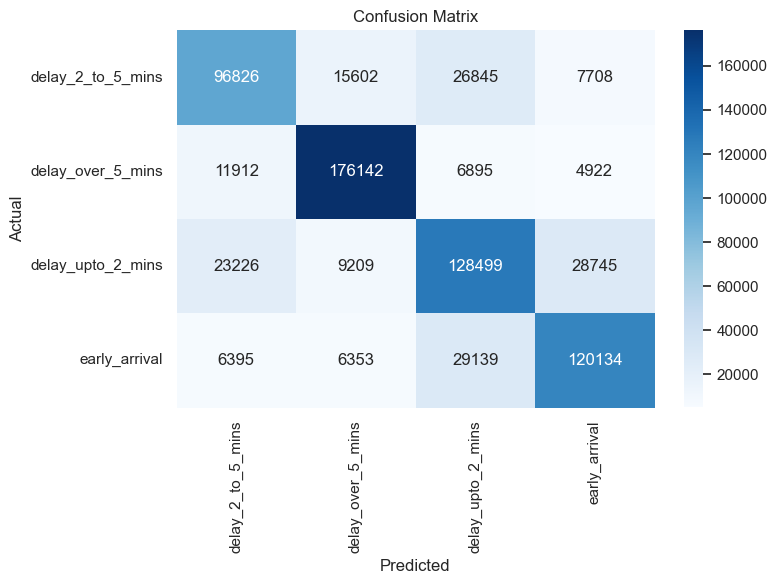

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels=None, normalize=False, figsize=(8, 6), cmap='Blues'):
    """
    Plots a confusion matrix with optional normalization.
    
    Parameters:
    - y_true: Ground truth labels
    - y_pred: Predicted labels
    - labels: List of class labels (optional). If None, will use sorted unique labels.
    - normalize: If True, normalize the confusion matrix rows
    - figsize: Size of the plot
    - cmap: Color map for the heatmap
    """
    if labels is None:
        labels = sorted(list(set(y_true) | set(y_pred)))
    
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = ".2f"
        title = "Normalized Confusion Matrix"
    else:
        fmt = "d"
        title = "Confusion Matrix"
    
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt=fmt, cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)